In [1]:
%cd /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5 

/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5


In [2]:
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def rename_df_cols(df):
    old_cols = list(df.columns)
    new_cols = ['epoch', 'train/box_loss', 'train/obj_loss',
       'train/cls_loss', 'metrics/precision', 'metrics/recall',
       'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss',
       'val/obj_loss', 'val/cls_loss', '/lr0', 'x/lr1', 'x/lr2']
    aux = dict(zip(old_cols, new_cols))
    df = df.rename(columns=aux)
    return df

def plot_losses(df_results):
    df_results.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Cls_loss")
    #plt.show()

## Training dataset preparation

In [4]:
data_path = '/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/italy/italy_paths.yaml'

## Model training: base model

### Fine tune: batch size

In [6]:
# Set batch size 

batch_s = [16,32,64]
'''
for batch in batch_s:
    # Give a name to the model
    model_name = f'b{batch}_e200_f12'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Train
    !python train.py --batch {batch} \
    --epochs 200 \
    --data {data_path} \
    --weights yolov5s6.pt \
    --cache \
    --freeze 12 \
    --project Italy \
    --name {model_name}'''

**************TRAINING MODEL b16_e200_f12*********
train: weights=yolov5s6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/italy/italy_paths.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Italy, name=b16_e200_f12, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 28 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: New cache created: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/italy/labels/train.cache
libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.0GB ram):   6%|▌         | 11/181 [00:00<00:02, 81.46itlibpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram):  50%|████▉     | 90/181 [00:00<00:00, 424.20ilibpng warning: iCCP: extra compressed data
train: Caching images (0.1GB ram): 100%|██████████| 181/181 [00:00<00:00, 385.30
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: New cache created: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/italy/labels/val.cache
val: Caching images (

     45/199       1.5G     0.0302    0.01645     0.0025         59        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.875       0.87      0.895      0.601

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     46/199       1.5G    0.02982    0.01501   0.002128         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.897      0.885      0.893      0.621

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199       1.5G     0.0293    0.01452    0.00273         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.855      0.858      0.908       0.62

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/19

     70/199       1.5G     0.0236    0.01353     0.0019         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.859      0.894      0.881      0.662

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     71/199       1.5G    0.02361    0.01272   0.001855         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.886      0.845      0.878      0.656

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199       1.5G     0.0239    0.01566   0.002074         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.872      0.884      0.882      0.646

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/19

     95/199       1.5G    0.02194    0.01286   0.002088         21        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.889      0.885      0.893      0.634

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     96/199       1.5G    0.02123    0.01212   0.001441         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.865      0.899      0.898      0.678

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199       1.5G    0.02027    0.01197   0.002183         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.904      0.833      0.888      0.682

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/19

    120/199       1.5G    0.01936    0.01116   0.001506          7        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.892      0.865      0.894      0.676

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    121/199       1.5G    0.01801    0.01162   0.000827         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.888       0.86      0.887      0.673

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199       1.5G     0.0171    0.01113   0.001079         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.892       0.86      0.883      0.661

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/19

    145/199       1.5G    0.01592     0.0119  0.0009179         31        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.902      0.851      0.886      0.667

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    146/199       1.5G    0.01617     0.0111  0.0008367         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.911      0.854      0.884      0.667

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199       1.5G    0.01565    0.01108  0.0008528         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.914      0.859      0.878      0.665

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/19

    170/199       1.5G    0.01342    0.01048    0.00118         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.888      0.851      0.887       0.69

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    171/199       1.5G    0.01326   0.009796  0.0006977         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.913      0.868      0.886       0.69

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199       1.5G     0.0135    0.01009  0.0005286         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.923      0.868      0.886      0.698

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/19

    195/199       1.5G     0.0128    0.01052  0.0005233         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.927       0.84      0.887      0.707

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    196/199       1.5G    0.01237    0.01001  0.0003063         31        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.927      0.831      0.888       0.71

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199       1.5G    0.01201   0.009358   0.000432         14        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.927      0.829       0.89      0.716

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/19

freezing model.4.m.0.cv2.conv.weight
freezing model.4.m.0.cv2.bn.weight
freezing model.4.m.0.cv2.bn.bias
freezing model.4.m.1.cv1.conv.weight
freezing model.4.m.1.cv1.bn.weight
freezing model.4.m.1.cv1.bn.bias
freezing model.4.m.1.cv2.conv.weight
freezing model.4.m.1.cv2.bn.weight
freezing model.4.m.1.cv2.bn.bias
freezing model.5.conv.weight
freezing model.5.bn.weight
freezing model.5.bn.bias
freezing model.6.cv1.conv.weight
freezing model.6.cv1.bn.weight
freezing model.6.cv1.bn.bias
freezing model.6.cv2.conv.weight
freezing model.6.cv2.bn.weight
freezing model.6.cv2.bn.bias
freezing model.6.cv3.conv.weight
freezing model.6.cv3.bn.weight
freezing model.6.cv3.bn.bias
freezing model.6.m.0.cv1.conv.weight
freezing model.6.m.0.cv1.bn.weight
freezing model.6.m.0.cv1.bn.bias
freezing model.6.m.0.cv2.conv.weight
freezing model.6.m.0.cv2.bn.weight
freezing model.6.m.0.cv2.bn.bias
freezing model.6.m.1.cv1.conv.weight
freezing model.6.m.1.cv1.bn.weight
freezing model.6.m.1.cv1.bn.bias
freezing m

     37/199      2.86G    0.03459    0.01655   0.002933        114        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.669      0.897      0.747      0.399

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     38/199      2.86G     0.0333     0.0176   0.003475        121        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.738      0.868       0.79      0.489

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     39/199      2.86G    0.03372    0.01669   0.002901         94        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.736      0.807      0.771       0.45

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     40/19

     62/199      2.86G    0.02638    0.01418   0.001693        113        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.866       0.93      0.916      0.652

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     63/199      2.86G    0.02604    0.01356   0.001931         69        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.854       0.93      0.912      0.614

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     64/199      2.86G    0.02537    0.01448    0.00202         83        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.878      0.947       0.92      0.635

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     65/19

     87/199      2.86G    0.02185    0.01271   0.001355         59        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.909      0.882      0.921      0.659

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     88/199      2.86G    0.02214    0.01283   0.001664         78        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.897      0.895      0.921      0.668

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     89/199      2.86G    0.02227    0.01367   0.001539        108        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76        0.9      0.912      0.911      0.688

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     90/19

    112/199      2.86G    0.01929     0.0115   0.001359         72        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.892      0.886      0.902      0.671

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    113/199      2.86G    0.01811    0.01208   0.001478         65        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.904      0.877      0.899      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    114/199      2.86G    0.01803    0.01081   0.001041         73        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.927      0.877      0.899      0.684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    115/19

    137/199      2.86G    0.01636    0.01108    0.00108         67        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.894      0.854      0.881      0.657

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    138/199      2.86G    0.01599     0.0106  0.0008744         75        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.89      0.865      0.878      0.681

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    139/199      2.86G    0.01638    0.01056  0.0008641         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.868      0.877      0.883      0.662

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    140/19

    162/199      2.86G    0.01429    0.01045  0.0005847         74        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.921      0.842       0.88      0.682

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    163/199      2.86G    0.01363   0.009737  0.0004075         80        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.912      0.835      0.887      0.699

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    164/199      2.86G    0.01361   0.009489  0.0008525         85        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.914      0.825       0.89      0.703

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    165/19

    187/199      2.86G    0.01287    0.01037  0.0002967         90        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.88      0.892      0.901      0.712

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    188/199      2.86G    0.01285   0.009692  0.0005513         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.878      0.894      0.907      0.718

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    189/199      2.86G    0.01339    0.00962  0.0004033        121        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.875      0.893      0.902      0.719

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    190/19

 27                -1  1    590336  models.common.Conv                      [256, 256, 3, 2]              
 28          [-1, 16]  1         0  models.common.Concat                    [1]                           
 29                -1  1    715008  models.common.C3                        [512, 384, 1, False]          
 30                -1  1   1327872  models.common.Conv                      [384, 384, 3, 2]              
 31          [-1, 12]  1         0  models.common.Concat                    [1]                           
 32                -1  1   1313792  models.common.C3                        [768, 512, 1, False]          
 33  [23, 26, 29, 32]  1     26964  models.yolo.Detect                      [2, [[19, 27, 44, 40, 38, 94], [96, 68, 86, 152, 180, 137], [140, 301, 303, 264, 238, 542], [436, 615, 739, 380, 925, 792]], [128, 256, 384, 512]]
Model summary: 281 layers, 12326164 parameters, 12326164 gradients, 16.3 GFLOPs

Transferred 451/459 items from yolov5s6.pt
AMP: checks

      6/199      3.37G    0.08365    0.03201    0.02256        206        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76     0.0214      0.281     0.0258    0.00916

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      7/199      3.37G    0.07437    0.03013    0.02225        184        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76     0.0915      0.281     0.0629     0.0202

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      8/199      3.37G     0.0709    0.03159    0.02159        236        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.608      0.167      0.191     0.0695

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      9/19

     31/199      3.37G    0.04643    0.02163    0.00617        234        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.343      0.702      0.475      0.253

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     32/199      3.37G    0.04707    0.01889   0.006036        202        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.531      0.614      0.609      0.304

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     33/199      3.37G    0.04644    0.01975   0.006071        187        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.517      0.684      0.603      0.294

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     34/19

     56/199      3.37G    0.03008    0.01461   0.002498        191        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.711      0.784      0.827      0.524

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     57/199      3.37G      0.031    0.01595   0.002635        291        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.725      0.807       0.81      0.507

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     58/199      3.37G    0.02973    0.01443   0.002574        195        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.798      0.882      0.865      0.561

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     59/19

     81/199      3.37G    0.02471    0.01302   0.001933        226        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.881       0.93      0.922      0.642

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     82/199      3.37G    0.02448    0.01293    0.00207        206        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.88       0.91      0.911      0.632

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     83/199      3.37G    0.02496    0.01417    0.00162        250        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.881      0.913      0.916      0.636

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     84/19

    106/199      3.37G    0.02007    0.01122   0.001407        181        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.908      0.889      0.902      0.656

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    107/199      3.37G    0.02053     0.0131    0.00149        257        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.917      0.878      0.903      0.677

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    108/199      3.37G    0.02101    0.01221   0.001143        214        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.911      0.899      0.894      0.677

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    109/19

    131/199      3.37G    0.01728    0.01105    0.00102        272        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.899      0.855      0.898      0.678

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    132/199      3.37G    0.01822    0.01115   0.001055        176        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.911      0.847      0.898      0.687

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    133/199      3.37G     0.0177    0.01114   0.001132        214        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.91      0.855      0.893      0.682

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    134/19

    156/199      3.37G     0.0156    0.01092  0.0007874        247        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.925      0.864        0.9      0.713

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    157/199      3.37G    0.01519   0.009794  0.0006014        167        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.864      0.904      0.901      0.712

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    158/199      3.37G    0.01624    0.01013  0.0005259        211        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.863      0.918      0.908      0.727

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    159/19

    181/199      3.37G     0.0129   0.009391  0.0004771        213        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.917       0.89      0.909      0.726

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    182/199      3.37G    0.01269   0.009338  0.0004132        202        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.918      0.891      0.909      0.731

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    183/199      3.37G    0.01348    0.01013  0.0005681        222        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.918      0.895       0.91      0.733

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    184/19

In [5]:
# Read results
results_b16 = rename_df_cols(pd.read_csv(f'Italy/b16_e200_f12/results.csv'))
results_b32 = rename_df_cols(pd.read_csv(f'Italy/b32_e200_f12/results.csv'))
results_b64 = rename_df_cols(pd.read_csv(f'Italy/b64_e200_f12/results.csv'))

### Plot: batch size comparision 

Text(0.5, 1.0, 'b64_e200_f12')

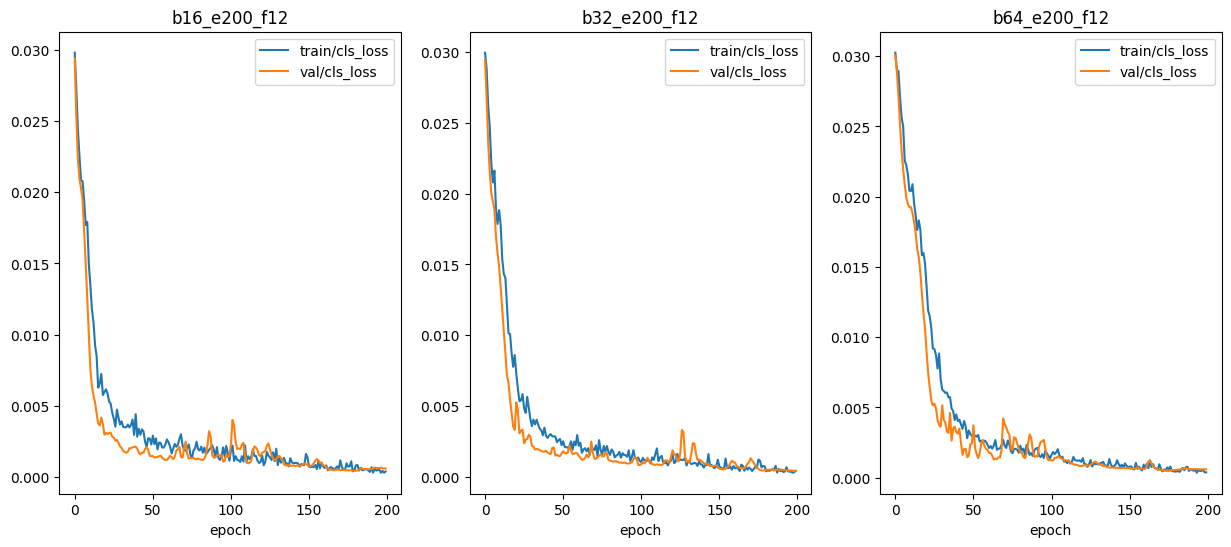

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results_b16.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('b16_e200_f12')
axes[1].set_title('b32_e200_f12')
axes[2].set_title('b64_e200_f12')

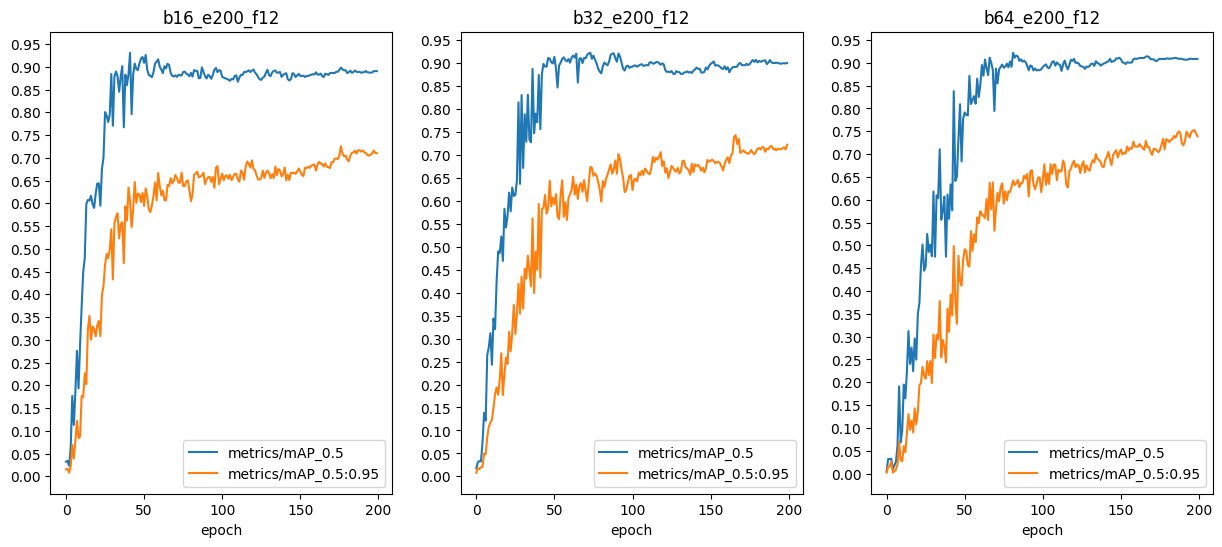

In [7]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results_b16.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[2])

# Set individual title 
axes[0].set_title('b16_e200_f12')
axes[1].set_title('b32_e200_f12')
axes[2].set_title('b64_e200_f12')

axes[0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axes[2].yaxis.set_major_locator(ticker.MultipleLocator(0.05))


In [8]:
print(results_b16['metrics/mAP_0.5'].max())
print(results_b16['metrics/mAP_0.5:0.95'].max())

print(results_b32['metrics/mAP_0.5'].max())
print(results_b32['metrics/mAP_0.5:0.95'].max())

print(results_b64['metrics/mAP_0.5'].max())
print(results_b64['metrics/mAP_0.5:0.95'].max())

0.93089
0.72546
0.92256
0.74302
0.92205
0.75242


#### Okay, the best model is with batch 32

## Medium model 

In [9]:
# Set batch size 

batch_s = [16,32,64]
'''
for batch in batch_s:
    # Give a name to the model
    model_name = f'b{batch}_e200_f12_v5m6'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Train
    !python train.py --batch {batch} \
    --epochs 200 \
    --data {data_path} \
    --weights yolov5m6.pt \
    --cache \
    --freeze 12 \
    --project Italy \
    --name {model_name}'''

**************TRAINING MODEL b16_e200_f12_v5m6*********
train: weights=yolov5m6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/italy/italy_paths.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Italy, name=b16_e200_f12_v5m6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 88 (delta 58), reused 79 (delta 55), pack-reused 0
Unpacking objects: 100% (88/88), 51.00 KiB | 408.00 KiB/s, d

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.0GB ram):   6%|▌         | 11/181 [00:00<00:02, 73.56itlibpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.0GB ram):  26%|██▌       | 47/181 [00:00<00:00, 184.32ilibpng warning: iCCP: extra compressed data
train: Caching images (0.1GB ram): 100%|██████████| 181/181 [00:00<00:00, 326.87
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 50/50 [00:00<00:00, 126.55it/s

AutoAnchor: 5.74 anchors/target, 0.995 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Italy/b16_e200_f12_v5m6/labels.jpg... 
Image sizes 640 trai

     21/199      2.53G    0.03555    0.01628   0.004569         12        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.576      0.702       0.67      0.395

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/199      2.53G     0.0354    0.01662   0.004484         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.634      0.877      0.801      0.513

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      2.53G    0.03472    0.01501   0.004632         30        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.617      0.816       0.81      0.516

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/19

     46/199      2.53G    0.02508     0.0123   0.002263         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.795      0.858      0.868      0.626

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      2.53G    0.02646    0.01196   0.002362         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.923      0.845      0.907      0.682

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      2.53G    0.02397    0.01128    0.00224         14        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.888      0.862       0.91      0.684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      2.53G    0.02067    0.01056   0.001577         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.845      0.819      0.892      0.689

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      2.53G    0.02165    0.01271   0.001509         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.884      0.814       0.89      0.675

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      2.53G    0.02021   0.009814   0.002073         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.804      0.848      0.882      0.705

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      2.53G    0.01751   0.009783   0.001262         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.885      0.777      0.862      0.699

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      2.53G    0.01793    0.00967    0.00117         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.902      0.774      0.874      0.712

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      2.53G     0.0177   0.009822    0.00124         42        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.869       0.82       0.87       0.71

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      2.53G    0.01463   0.009101   0.001024         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.89      0.833      0.921      0.755

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      2.53G    0.01442   0.009007   0.001089         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.821       0.92      0.919      0.756

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      2.53G     0.0145   0.009168   0.001625         30        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.86      0.863      0.911      0.764

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      2.53G    0.01299   0.008639  0.0007811         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.903      0.884      0.916      0.775

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      2.53G    0.01199   0.008382  0.0008233         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.897      0.893      0.913      0.757

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      2.53G    0.01183   0.007983  0.0007748         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.895      0.881      0.903      0.759

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      2.53G    0.01026    0.00729   0.000463         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.894       0.88      0.922      0.787

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      2.53G    0.01022   0.007595   0.000403         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.895      0.893      0.924      0.785

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      2.53G    0.01041   0.007546  0.0004364         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.894      0.883      0.919      0.784

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      2.53G   0.008553   0.007311  0.0002561         31        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.887      0.884      0.912      0.792

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      2.53G   0.008547   0.006922  0.0002333         14        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.885      0.886      0.912      0.798

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      2.53G   0.008949   0.007247  0.0002719         24        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.888      0.886       0.91      0.794

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.0GB ram):   6%|▌         | 11/181 [00:00<00:02, 80.33itlibpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram):  50%|████▉     | 90/181 [00:00<00:00, 406.44ilibpng warning: iCCP: extra compressed data
train: Caching images (0.1GB ram): 100%|██████████| 181/181 [00:00<00:00, 382.93
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 50/50 [00:00<00:00, 92.63it/s]

AutoAnchor: 5.74 anchors/target, 0.995 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Italy/b32_e200_f12_v5m6/labels.jpg... 
Image sizes 640 trai

     21/199       4.9G    0.04378    0.01911    0.00601         86        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.599      0.649      0.643      0.376

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/199       4.9G    0.04305    0.02072   0.005405        122        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.464      0.887       0.65       0.34

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199       4.9G    0.04119    0.01794    0.00563        115        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.605      0.623       0.62       0.32

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/19

     46/199       4.9G    0.02793    0.01308   0.002199        156        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.718       0.86       0.86      0.583

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199       4.9G    0.02759    0.01301   0.002668        138        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.854      0.822      0.898       0.67

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199       4.9G     0.0262    0.01283   0.002552         74        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.917      0.828      0.935      0.655

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199       4.9G    0.02246    0.01176    0.00202         66        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.814      0.921      0.912      0.685

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199       4.9G    0.02064    0.01108   0.001533         60        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.784      0.911      0.895      0.633

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199       4.9G    0.02142    0.01136   0.002324         93        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.813      0.912      0.904      0.683

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199       4.9G    0.01847   0.009336   0.001353         58        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.874      0.787      0.883      0.709

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199       4.9G    0.01789   0.009354   0.001231         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.825      0.883      0.887      0.689

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199       4.9G    0.01759   0.009495   0.001057         98        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.816      0.893      0.893      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199       4.9G    0.01443    0.00768  0.0009941         68        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.916      0.834      0.879      0.719

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199       4.9G    0.01494   0.009353   0.001576         93        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.901      0.819      0.873      0.724

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199       4.9G    0.01415   0.008514   0.001294        100        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76        0.9      0.829      0.874      0.701

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199       4.9G    0.01251   0.008445  0.0006819        101        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.914      0.823      0.874      0.746

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199       4.9G    0.01263   0.008615  0.0008626         95        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.913      0.806      0.866      0.744

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199       4.9G    0.01184   0.007642  0.0005944         60        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.886      0.849      0.867      0.742

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199       4.9G    0.01018   0.007344  0.0004241         62        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.888      0.841      0.883      0.765

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199       4.9G    0.01039   0.008477  0.0005361        148        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.889      0.851      0.884      0.757

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199       4.9G    0.01043    0.00814  0.0004214         68        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.89      0.851      0.884      0.761

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199       4.9G   0.008499   0.007564   0.000307         90        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76        0.9      0.798      0.878      0.771

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199       4.9G   0.007973   0.006145  0.0002736         55        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.901      0.799      0.879      0.771

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199       4.9G   0.008485   0.007873  0.0002572         81        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.902      0.798      0.879      0.773

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

freezing model.3.conv.weight
freezing model.3.bn.weight
freezing model.3.bn.bias
freezing model.4.cv1.conv.weight
freezing model.4.cv1.bn.weight
freezing model.4.cv1.bn.bias
freezing model.4.cv2.conv.weight
freezing model.4.cv2.bn.weight
freezing model.4.cv2.bn.bias
freezing model.4.cv3.conv.weight
freezing model.4.cv3.bn.weight
freezing model.4.cv3.bn.bias
freezing model.4.m.0.cv1.conv.weight
freezing model.4.m.0.cv1.bn.weight
freezing model.4.m.0.cv1.bn.bias
freezing model.4.m.0.cv2.conv.weight
freezing model.4.m.0.cv2.bn.weight
freezing model.4.m.0.cv2.bn.bias
freezing model.4.m.1.cv1.conv.weight
freezing model.4.m.1.cv1.bn.weight
freezing model.4.m.1.cv1.bn.bias
freezing model.4.m.1.cv2.conv.weight
freezing model.4.m.1.cv2.bn.weight
freezing model.4.m.1.cv2.bn.bias
freezing model.4.m.2.cv1.conv.weight
freezing model.4.m.2.cv1.bn.weight
freezing model.4.m.2.cv1.bn.bias
freezing model.4.m.2.cv2.conv.weight
freezing model.4.m.2.cv2.bn.weight
freezing model.4.m.2.cv2.bn.bias
freezing m


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      7/199      6.71G    0.06525    0.03358    0.02246        184        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76    0.00776      0.772     0.0498     0.0167

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      8/199      6.71G    0.06198     0.0349     0.0217        236        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.099      0.219      0.094     0.0301

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      9/199      6.71G     0.0592    0.03292    0.02069        257        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.168      0.211      0.101     0.0402

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     32/199      6.71G    0.04344    0.01709   0.005939        202        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.377      0.667      0.495      0.259

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     33/199      6.71G    0.04338    0.01779   0.006223        187        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.759      0.523      0.613      0.327

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     34/199      6.71G    0.04219    0.01618   0.005703        190        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.502      0.702      0.681      0.365

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     57/199      6.71G      0.028    0.01323   0.002431        291        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.632      0.894      0.793      0.541

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     58/199      6.71G     0.0274    0.01212   0.002757        195        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.775      0.904      0.867      0.647

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     59/199      6.71G    0.02747    0.01397     0.0024        345        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.725      0.881      0.812      0.552

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     82/199      6.71G    0.02207    0.01076   0.001803        206        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.912      0.871      0.917      0.672

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     83/199      6.71G    0.02088    0.01144   0.001471        250        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.896       0.87      0.918      0.701

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     84/199      6.71G     0.0207    0.01097   0.002098        235        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.799      0.912      0.905      0.697

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    107/199      6.71G    0.01761    0.01076   0.001326        257        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.905      0.876      0.899       0.73

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    108/199      6.71G     0.0174   0.009988   0.001264        214        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.86      0.884      0.893      0.759

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    109/199      6.71G    0.01713   0.009681   0.001224        230        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.889      0.867      0.896      0.703

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    132/199      6.71G    0.01517   0.009104   0.001068        176        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.918      0.912      0.934      0.775

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    133/199      6.71G    0.01455   0.009006   0.001175        214        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76        0.9      0.912      0.932      0.776

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    134/199      6.71G    0.01433   0.009349  0.0008505        307        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.895      0.902      0.927      0.772

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    157/199      6.71G    0.01228   0.007584  0.0009169        167        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.929      0.845      0.908      0.766

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    158/199      6.71G    0.01217   0.008054  0.0006622        211        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.93      0.837      0.906      0.776

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    159/199      6.71G     0.0119   0.008703  0.0007301        229        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.927      0.838      0.908      0.769

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    182/199      6.71G   0.009531   0.007226  0.0003995        202        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.878      0.942      0.939      0.813

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    183/199      6.71G   0.009685    0.00729  0.0003595        222        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.877      0.943      0.937       0.81

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    184/199      6.71G   0.009483   0.008015  0.0005147        203        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.886      0.935      0.936      0.813

      Epo

In [10]:
# Read results
results_b16_v5m6 = rename_df_cols(pd.read_csv(f'Italy/b16_e200_f12_v5m6/results.csv'))
results_b32_v5m6 = rename_df_cols(pd.read_csv(f'Italy/b32_e200_f12_v5m6/results.csv'))
results_b64_v5m6 = rename_df_cols(pd.read_csv(f'Italy/b64_e200_f12_v5m6/results.csv'))

Text(0.5, 1.0, 'b64_e200_f12_v5m6')

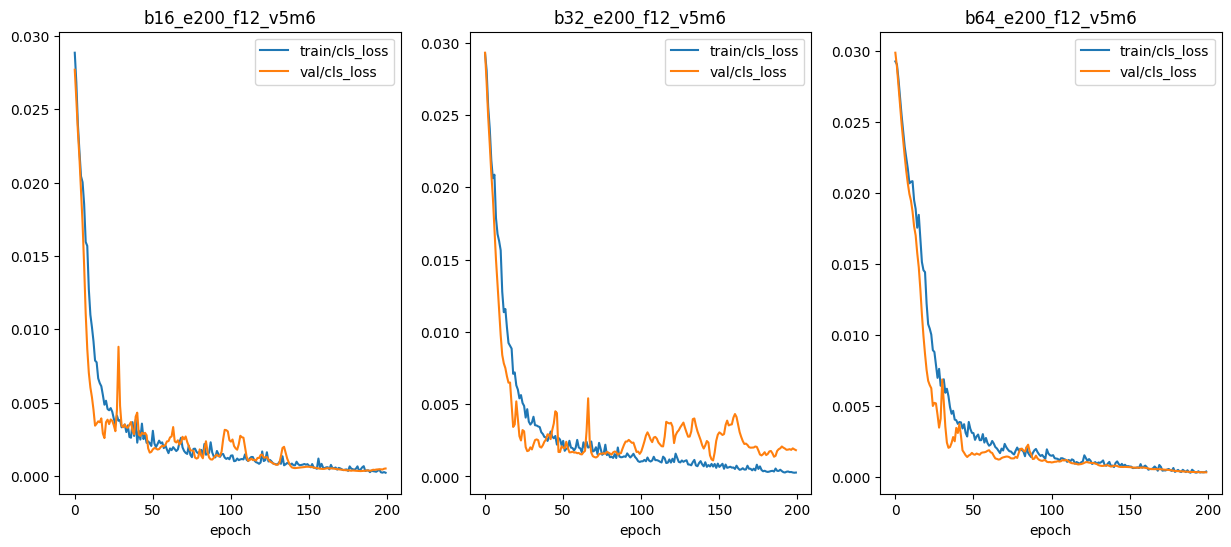

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results_b16_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0])
# base_two_clases_b32_e150_f122
results_b32_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('b16_e200_f12_v5m6')
axes[1].set_title('b32_e200_f12_v5m6')
axes[2].set_title('b64_e200_f12_v5m6')

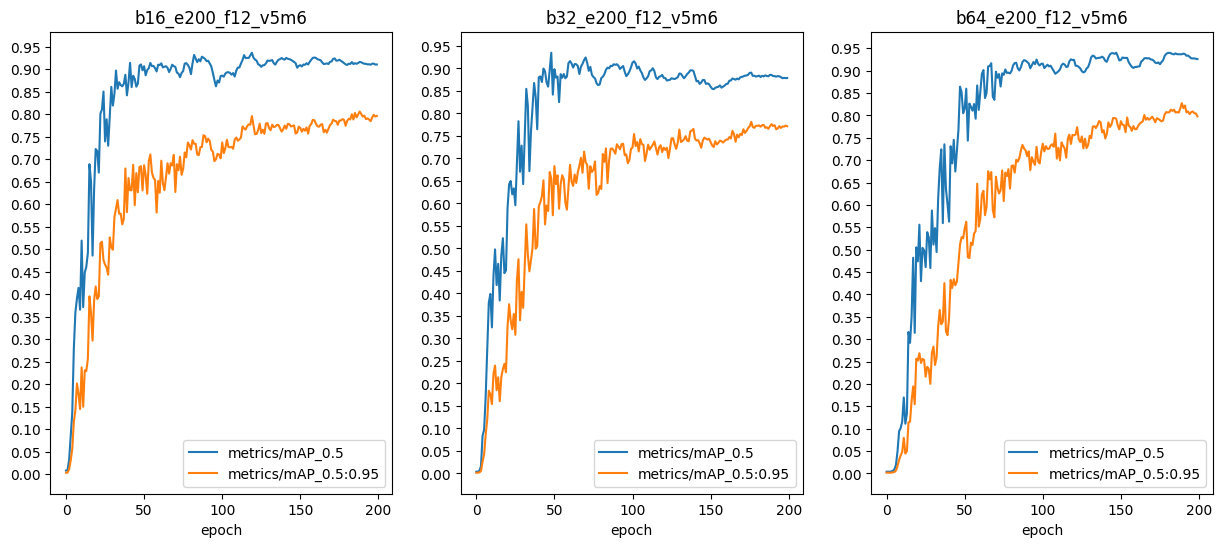

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results_b16_v5m6.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[0])
# base_two_clases_b32_e150_f122
results_b32_v5m6.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64_v5m6.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[2])

# Set individual title 
axes[0].set_title('b16_e200_f12_v5m6')
axes[1].set_title('b32_e200_f12_v5m6')
axes[2].set_title('b64_e200_f12_v5m6')

axes[0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axes[2].yaxis.set_major_locator(ticker.MultipleLocator(0.05))

In [21]:
print(results_b16_v5m6['metrics/mAP_0.5'].max())
print(results_b16_v5m6['metrics/mAP_0.5:0.95'].max())

print(results_b32_v5m6['metrics/mAP_0.5'].max())
print(results_b32_v5m6['metrics/mAP_0.5:0.95'].max())

print(results_b64_v5m6['metrics/mAP_0.5'].max())
print(results_b64_v5m6['metrics/mAP_0.5:0.95'].max())

0.93622
0.80552
0.93501
0.78143
0.94007
0.82732


In [22]:
print(results_b16_v5m6['train/cls_loss'].min())
print(results_b16_v5m6['val/cls_loss'].min())

print(results_b32_v5m6['train/cls_loss'].min())
print(results_b32_v5m6['val/cls_loss'].min())

print(results_b64_v5m6['train/cls_loss'].min())
print(results_b64_v5m6['val/cls_loss'].min())

0.00022842
0.00034012
0.00025725
0.0011092
0.00030927
0.00033603


### The model selected so far is <span style="color:red">b64_e200_f12_v5m6</span>. 